<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LinearRegression/19_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/2-multiplegradesdataset.csv')

In [ ]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [ ]:
# yukarıdaki data için yeni gelen öğrenciler için sınav skoru hesaplamaya çalışacağız

In [ ]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [ ]:
df.isnull().sum()

,0
Study Hours,0
Sleep Hours,0
Attendance Rate,0
Social Media Hours,0
Exam Score,0


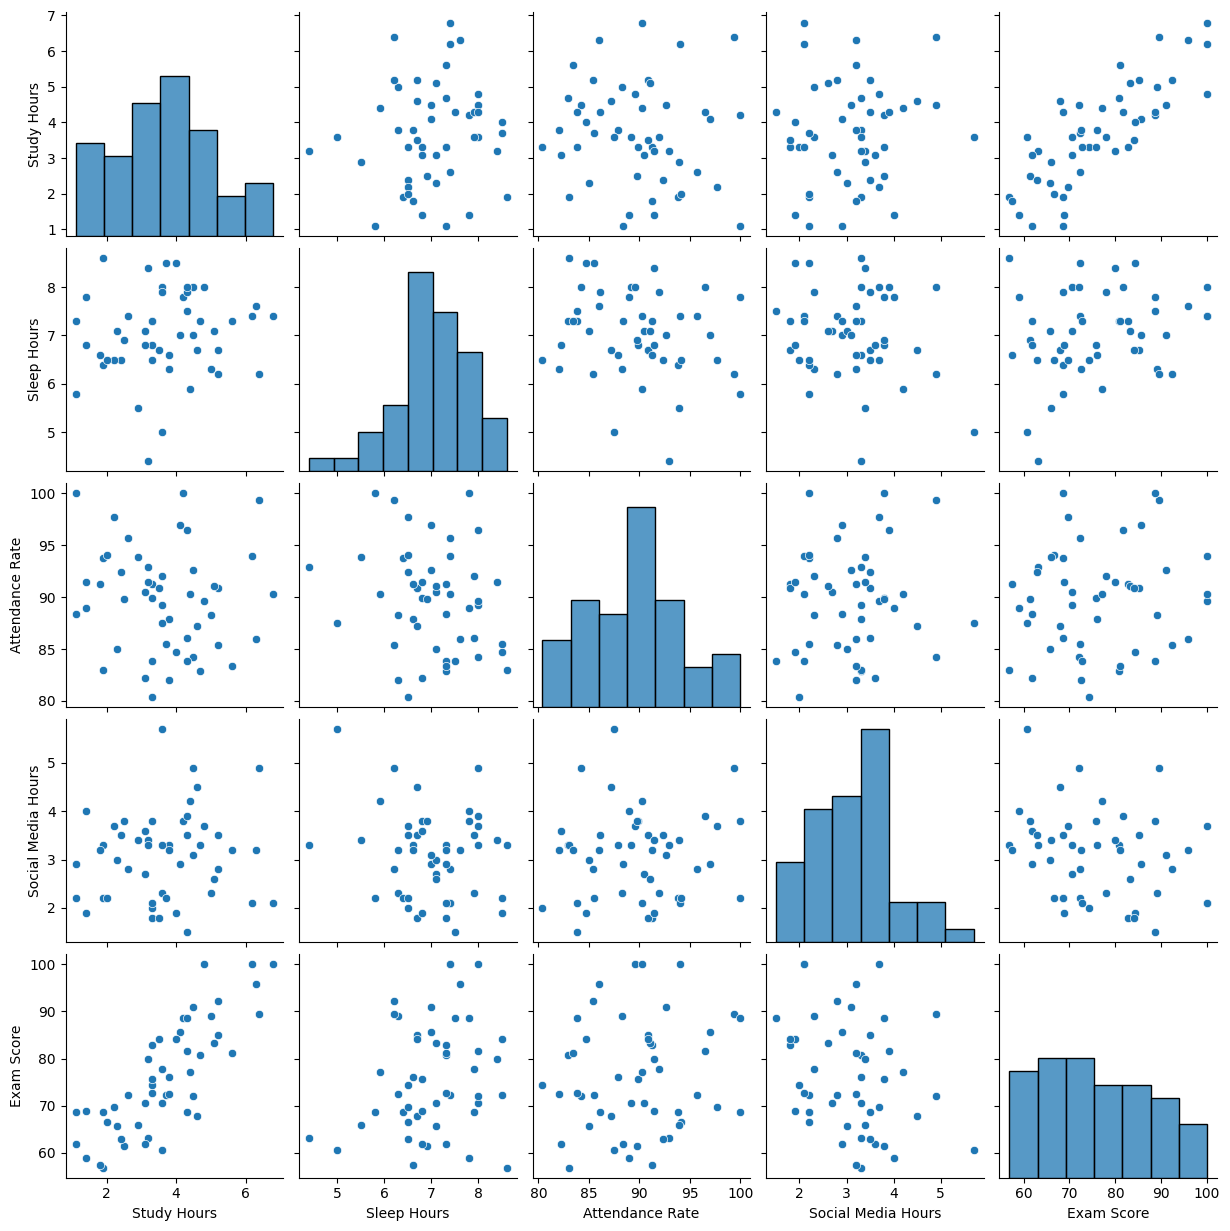

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.corr() # burdanda görüldüğü üzere study hours ve exam score kesişimine baktığımızda yüksek korelasyon görüyoruz yani study hours arttığında alacağı exam score yüksek olabilir gibi yorum yapabiliriz
          # mesela social media hours ile exam score arasında bir negatif korelasyon olduğunu görmekteyiz social media kullanımı artarsa sınavdan düşük alacak gibi yorumlamak mümkün
          # bu yüzden social medianın tetası negatif olacak

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


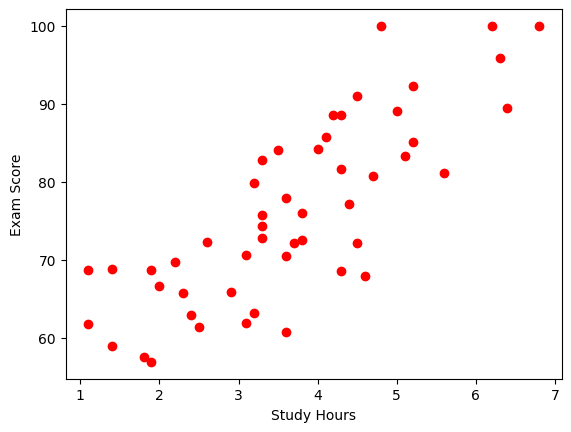

In [ ]:
plt.scatter(df['Study Hours'],df['Exam Score'],color="r")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

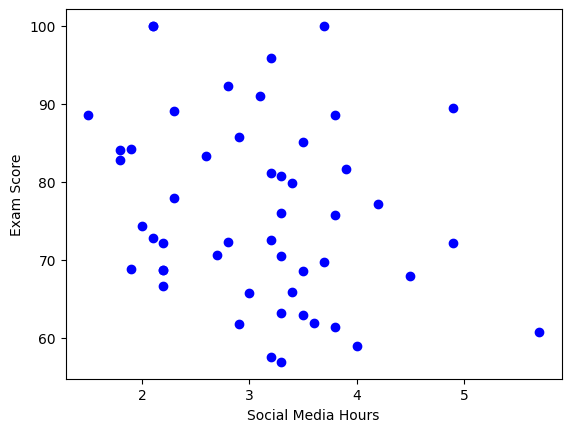

In [ ]:
plt.scatter(df['Social Media Hours'],df['Exam Score'],color = "b")
plt.xlabel("Social Media Hours")
plt.ylabel("Exam Score")
plt.show()

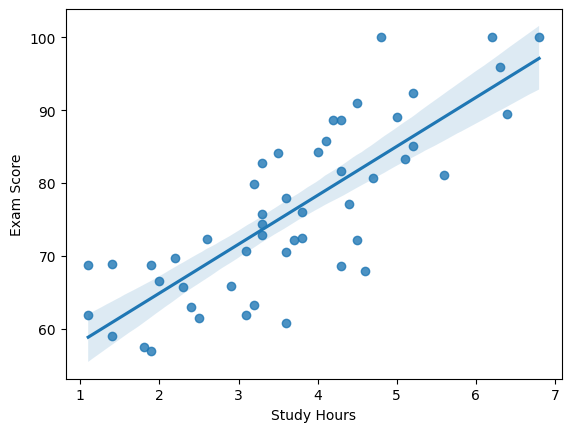

In [ ]:
sns.regplot(x=df['Study Hours'],y=df['Exam Score']) # seaborn kütüphanesinden reglot best fit çizmeye çalışır
plt.show()

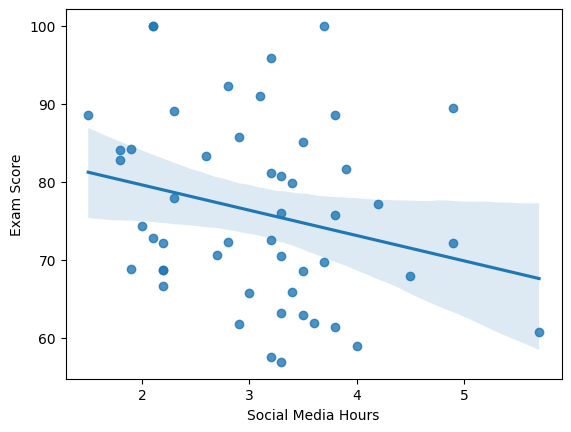

In [ ]:
sns.regplot(x=df['Social Media Hours'],y=df['Exam Score']) # seaborn kütüphanesinden reglot best fit çizmeye çalışır
plt.show()

In [ ]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [ ]:
# independent and dependent features
X = df.iloc[:,:-1] # burası son kolon hariç hepsini al
y = df.iloc[:,-1] # burasıda sadece son kolonu al demek bunu yapabilmemiz içinde y nin son kolonda olması lazım

# X = df[['Study Hours','Sleep Hours','Attendance Rate','Social Media Hours']]
# y = df['Exam Score']

In [ ]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [ ]:
y.head()

,Exam Score
0,80.7
1,76.0
2,89.1
3,95.9
4,70.5


In [ ]:
# train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.25,random_state=15)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.62612986, -1.23356935,  1.68167565,  0.75837914],
       [-1.3148727 ,  0.27573903, -0.39296298, -0.38468507],
       [ 0.68874285,  1.59638387,  1.41398034,  1.04414519],
       [-0.56351687, -0.10158806, -1.15143302, -0.24180205],
       [-0.75135583, -1.23356935,  0.87858973, -1.38486626],
       [ 0.18783896, -0.85624226,  0.16473557, -1.95639837],
       [ 1.94100256,  0.84172968, -0.9283536 ,  0.04396401],
       [-0.50090389, -1.23356935,  0.49935471,  0.47261309],
       [-0.06261299, -0.66757871, -1.7760554 ,  0.61549611],
       [ 0.68874285,  1.40772032, -0.90604565,  0.47261309],
       [-1.12703375,  1.21905677, -0.25911533,  1.18702822],
       [-0.4382909 , -0.47891516, -0.08065179,  0.90126217],
       [ 1.87838958,  0.46440258,  0.85628178, -1.52774929]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test[0]

array([ 1.00180777,  1.59638387, -0.12526768,  0.75837914])

In [ ]:
df.iloc[0]

,0
Study Hours,4.7
Sleep Hours,7.3
Attendance Rate,82.9
Social Media Hours,3.3
Exam Score,80.7


In [ ]:
new_student = [[5,7,90,4]]

In [ ]:
new_student_scaled = scaler.transform(new_student)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
regression.predict(new_student_scaled)

array([78.69079114])

In [ ]:
# prediction

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
y_pred

array([ 81.25394649,  62.44471058,  83.32873318,  67.90781832,
        83.97589306,  83.48345946,  68.27037523,  85.5459962 ,
        74.98150271,  72.49565274,  85.38147467,  74.89223485,
        66.73034513,  88.3470152 ,  87.17172346,  81.74026371,
        67.5654719 ,  67.69156022,  82.38978831,  70.05322164,
        75.48423567,  74.87371028,  71.27110121,  84.18983971,
        61.63476825, 102.4042142 ,  68.71961776,  53.32441555,
        81.08078858,  68.25797577,  82.7421443 ,  70.57932446,
        74.39219375,  76.57580993,  82.89333852,  71.20094992,
        81.87234444])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mse = mean_absolute_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("mse : ",mse)
print("mae : ",mae)

mse :  4.29935778002633
mae :  4.29935778002633


In [ ]:
score = r2_score(y_test,y_pred)
print("R2 SCORE : ",score)

R2 SCORE :  0.7382584226425326


In [ ]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # adjusted r2 score formula

0.7055407254728492

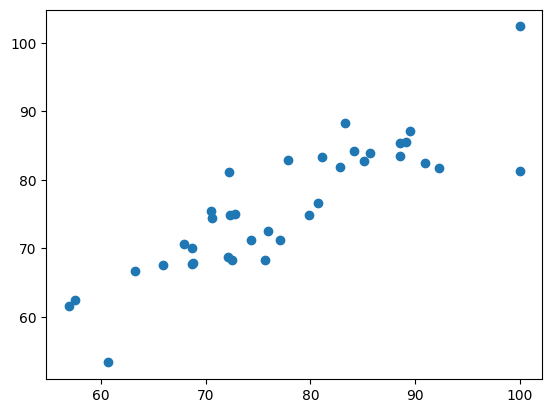

In [ ]:
plt.scatter(y_test,y_pred) # grafik doğrusalsa y_test ile y_pred arasındaki fark yani residual normal bi distrübisyon izliyor demektir
plt.show()

In [ ]:
y_pred

array([ 81.25394649,  62.44471058,  83.32873318,  67.90781832,
        83.97589306,  83.48345946,  68.27037523,  85.5459962 ,
        74.98150271,  72.49565274,  85.38147467,  74.89223485,
        66.73034513,  88.3470152 ,  87.17172346,  81.74026371,
        67.5654719 ,  67.69156022,  82.38978831,  70.05322164,
        75.48423567,  74.87371028,  71.27110121,  84.18983971,
        61.63476825, 102.4042142 ,  68.71961776,  53.32441555,
        81.08078858,  68.25797577,  82.7421443 ,  70.57932446,
        74.39219375,  76.57580993,  82.89333852,  71.20094992,
        81.87234444])

In [ ]:
residuals = y_test-y_pred

In [ ]:
print(residuals)

9     18.746054
44    -4.944711
47    -2.228733
49     0.892182
22     1.724107
25     5.116541
42     4.229625
2      3.554004
46    -2.181503
1      3.504347
39     3.218525
18    -2.592235
24    -3.530345
40    -5.047015
6      2.328277
34    10.559736
45    -1.665472
13     1.008440
48     8.610212
19    -1.353222
4     -4.984236
15     5.026290
10     3.028899
32     0.010160
23    -4.734768
31    -2.404214
17     3.380382
29     7.375584
21    -8.880789
11     7.442024
7      2.357856
27    -2.679324
28    -3.792194
0      4.124190
5     -4.993339
12     5.899050
8      0.927656
Name: Exam Score, dtype: float64


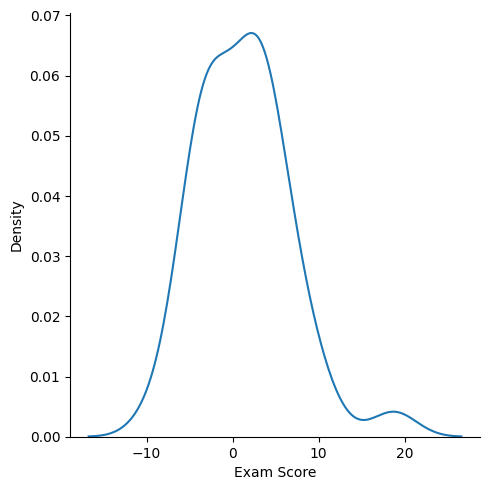

In [ ]:
sns.displot(residuals,kind="kde")
plt.show()

In [ ]:
regression.intercept_

np.float64(72.25384615384617)

In [ ]:
regression.coef_   # kolonların katsayıları

array([10.35640042,  1.28287841,  3.09313687, -4.00263968])

In [ ]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [ ]:
df

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5
5,3.6,7.9,92.0,2.3,77.9
6,6.4,6.2,99.4,4.9,89.5
7,5.2,6.7,90.9,3.5,85.1
8,3.3,7.3,91.3,1.8,82.8
9,4.8,8.0,89.6,3.7,100.0


In [ ]:
students = [

            [6,8,95,5],
            [3,6,85,3],
            [4,7,80,4]

]

In [ ]:
regression.predict(scaler.transform(students))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([85.32654981, 65.57058093, 65.30618773])